# Introducción a Machine Learning 


### Ejemplo de aprendizaje supervisado: Clasificación de flores 


#### Importamos las librerias necesarias 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
#Cargamos el dataset
iris = sns.load_dataset('iris')

Cuántas columnas y filas tiene el dataset?

In [3]:
iris.shape

(150, 5)

Qué columnas tiene el dataset?

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Cómo es la distribución entre las especies?

In [6]:
iris['species'].value_counts(normalize=True) #Vemos que las especies estan distribuidas equitativamente

virginica     0.333333
versicolor    0.333333
setosa        0.333333
Name: species, dtype: float64

Un poco de visualización siempre ayuda a entender los datos. Qué podemos decir de estos?

C:\Users\Ianina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


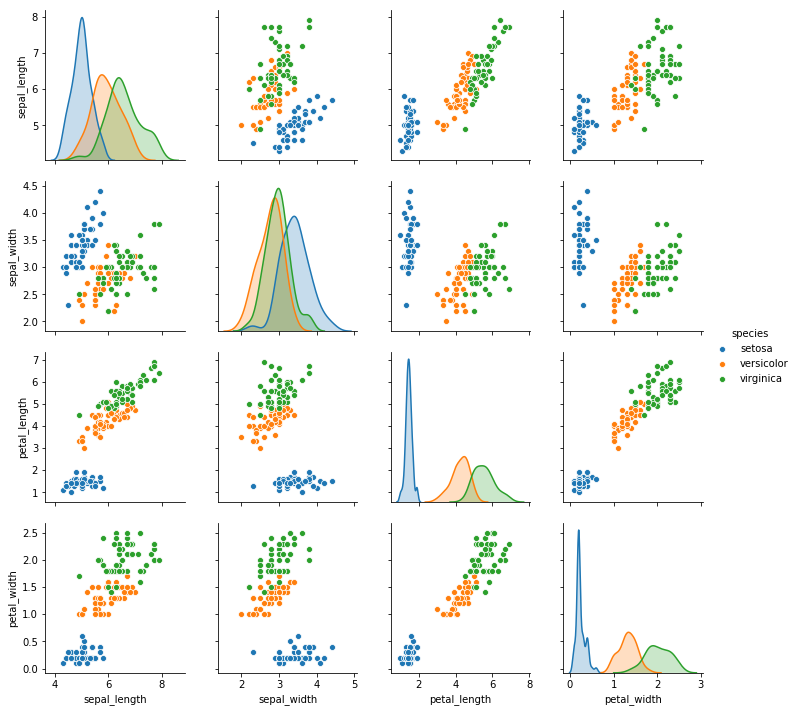

In [7]:
sns.pairplot(iris,hue='species')

La observación de una matriz de correlación entre las distintas features muchas veces nos ayuda a seleccionar aquellas a incluir en nuestro modelo de ML. 


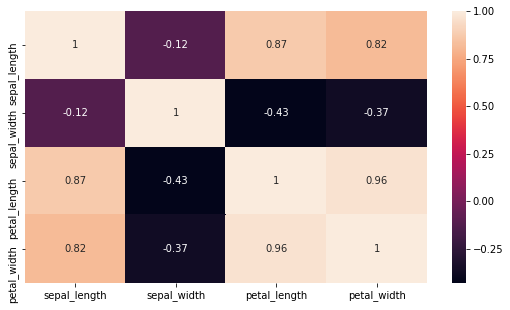

In [8]:
plt.figure(figsize=(9,5)) 
sns.heatmap(iris.corr(),annot=True) 
plt.show()

- Cuál sería un ejemplo de correlación alta, y cuál un ejemplo de poca correlación?

En este ejemplo vamos a incluir todas las features

## Qué vamos a querer predecir?
Utilizando los datos de longitud y ancho sépalo y pétalo vamos a predecir a que especie pertenece un nuevo ejemplar de esta flor.

A las características (features) utilizadas en la predicción se las agrupa en una matriz de features (X). La columna a predecir (species) se conoce como el array o vector target (y). Estas 2 son separadas en nuevas variables: ``X_iris`` e ``y_iris`` respectivamente (Notar que el primero se define con mayúscula y el segundo con minúscula)

Nombramos X_iris a la matriz de features

In [9]:
X_iris = iris.drop('species', axis=1) 
X_iris.columns #vemos que la columna species fue removida exitosamente.

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

Nombramos y_iris al Array Target (y)

In [10]:
y_iris = iris['species'] 

Qué shape creen que tendrá el X_iris?

In [11]:
X_iris.shape

(150, 4)

Y el y_iris?

In [12]:
y_iris.shape

(150,)

In [13]:
type(y_iris)

pandas.core.series.Series

### El modelo que vamos a utilizar es extremadamente simple conocido como Naive Bayes Gausiano, el cuál procede asumiendo que cada clase se construye a partir de una distribución Gausiana.

Este modelo es muy rápido y no tiene hiperparámetros para elegir a diferencia de otros modelos de ML. Debido a esto, es frecuentemente un buen modelo para usar como una clasificación baseline, antes de explorar otros modelos más sofisticados.


[Documentación ``sklearn.GaussianNB``](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

Dividiremos los datos en un set de entrenamiento o *training set* y un set de testeo o *testing set* utilizando la función ``train_test_split`` de Scikit-Learn. Esto se realiza debido a que queremos evaluar el modelo en datos que no hayan sido usados en el entrenamiento.

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1) 

Veamos como quedaron divididos el set de entrenamiento y el de testeo.

In [15]:
y_train.shape, y_test.shape

((112,), (38,))

Los datos ya estan preparados, a continuación vamos a entrenar el modelo y predecir las etiquetas

### 1. Elegir la clase de modelo: en este caso, Gaussian naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB 

### 2. Instanciar el modelo

In [17]:
model = GaussianNB() 

### 3. Ajustar el modelo a los datos
Aplicaremos nuestro modelo a los datos con el método fit() 

In [18]:
model.fit(X_train, y_train)       

GaussianNB(priors=None, var_smoothing=1e-09)

### 4. Predecir etiquetas para datos desconocidos
Una vez que el modelo es entrenado, la principal tarea en el aprendizaje supervisado es evaluarlo en base a lo que dice acerca de nuevos datos que no fueron parte del set de entrenamiento. Para esto se utiliza el método predict() de Scikit-Learn. En el contexto de este ejemplo, nuestro "nuevo dataset" será ``X_test`` y observaremos los valores ``y`` que el modelo predice ``(y_pred)``.

In [19]:
y_pred = model.predict(X_test)            

Finalmente, podemos usar la función **accuracy_score** para estudiar la proporción de etiquetas predichas que coinciden con el valor de verdad correspondiente a esa observación. El accuracy se calcula como la proporción samples correctamente clasificados sobre el total de samples.

In [20]:
from sklearn.metrics import accuracy_score
print('Accuracy=', accuracy_score(y_test, y_pred))#cuantos son iguales/total.

Accuracy= 0.9736842105263158


Conclusión: encontramos que el ``97.3%`` de los casos en el test set han sido correctamente clasificados utilizando el modelo ``Gaussian naive Bayes``

### Información adicional
https://es.wikipedia.org/wiki/Iris_(planta)

[Qué es un Sépalo?](https://es.wikipedia.org/wiki/S%C3%A9palo#/media/File:P%C3%A9talo-s%C3%A9palo.jpg) 